<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analysis/blob/main/E-Commerse%20Customer%20Analysis/Customers_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Use Cases :

- Segmentasi pelanggan:
Analisis dan kategorikan pelanggan berdasarkan demografi, kebiasaan belanja, dan tingkat kepuasan.

- Analisis Kepuasan:
Selidiki faktor-faktor yang mempengaruhi kepuasan pelanggan dan identifikasi area yang perlu ditingkatkan.

- Strategi Promosi:
Menilai dampak diskon terhadap belanja pelanggan dan menyesuaikan strategi promosi.

- Strategi Retensi:
Kembangkan strategi retensi yang ditargetkan dengan memahami kesenjangan waktu sejak pembelian terakhir.

- Wawasan berbasis kota:
Jelajahi variasi regional dalam perilaku pelanggan untuk mengoptimalkan upaya pemasaran berdasarkan tren spesifik lokasi.

|Catatan: Kumpulan data ini dibuat secara sintetis untuk tujuan ilustrasi, dan kemiripan apa pun dengan individu atau skenario sebenarnya adalah suatu kebetulan.

Source : https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/gdrive")

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


# Data Cleaning

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/E-Commerse Customer_Dataset/Customers.csv")
df.head(2)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3


# Data Cleaning

In [ ]:
df.shape

(2000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())

    print()

CustomerID int64
1 2000

Gender object
['Male' 'Female']

Age int64
0 99

Annual Income ($) int64
0 189974

Spending Score (1-100) int64
0 100

Profession object
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

Work Experience int64
0 17

Family Size int64
1 9



### Remove columns

In [ ]:
df.drop(columns=["CustomerID"], inplace=True)
df.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3


### Missing Values

In [ ]:
df.dropna(inplace=True)

# Data Eksploratory

### Outliers

In [ ]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.columns

Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience',
       'Family Size'],
      dtype='object')

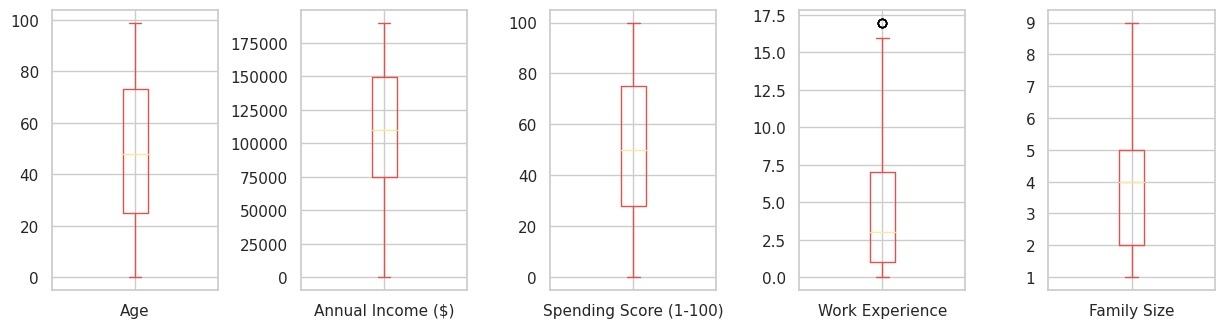

In [ ]:
df_to_plot.plot(subplots=True, layout=[2,5], kind="box", figsize=(15,8))
plt.subplots_adjust(wspace=0.5);

### Data Distribution

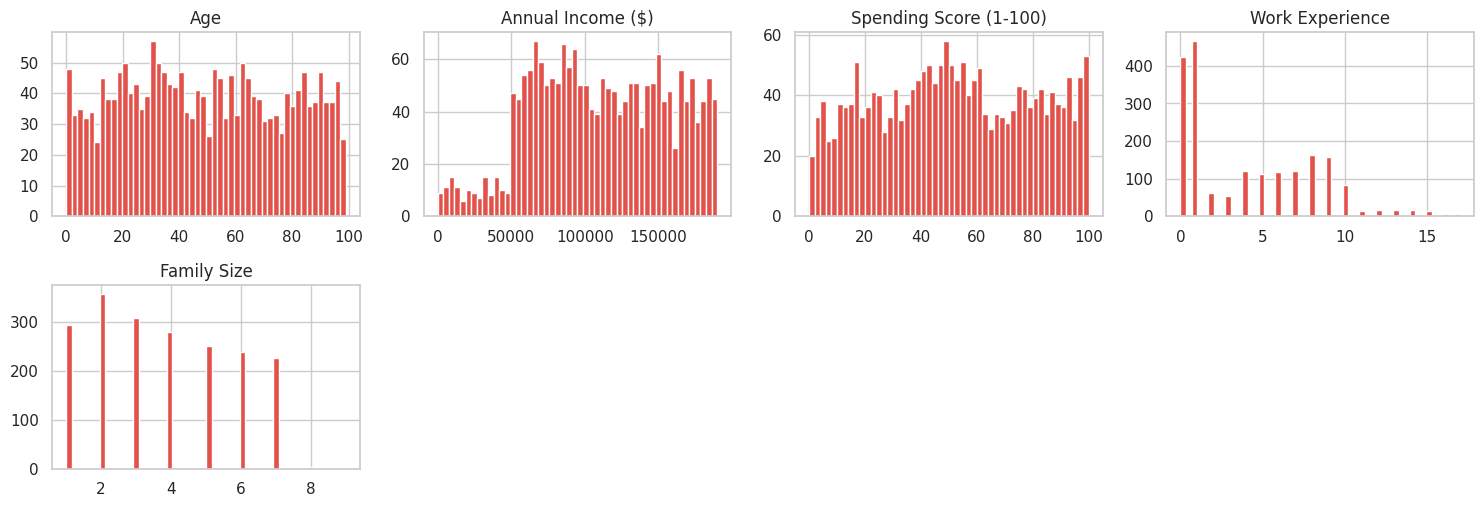

In [ ]:
numeric = df_to_plot.columns
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()



*   Rata rata customers memiliki income tahunan lebih dari 50000$
*   Customers cenderung memiliki work experience 0 - 2 tahun
*   Customer yang membeli memiliki family size 2

### Data Insight

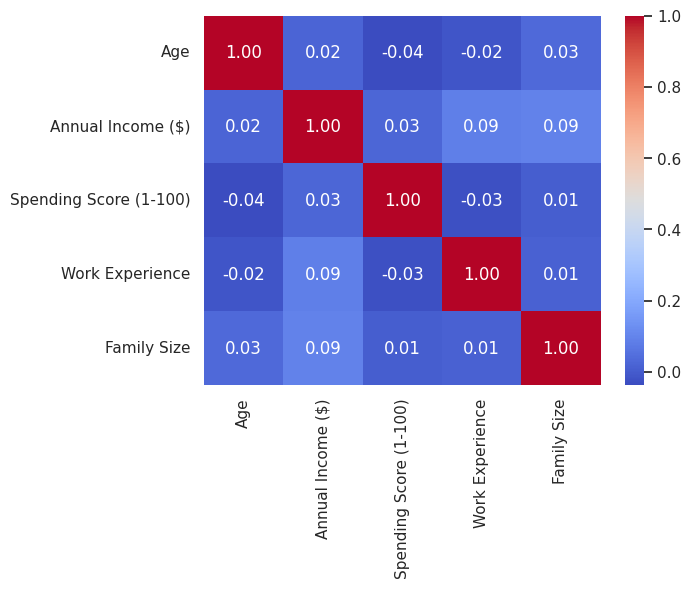

In [ ]:
corr = df_to_plot.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

* Yang mungkin memengaruhi spending score adalah annual income dan family size customer namun tidak signifikan

In [ ]:
df_to_plot.columns

Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience',
       'Family Size'],
      dtype='object')

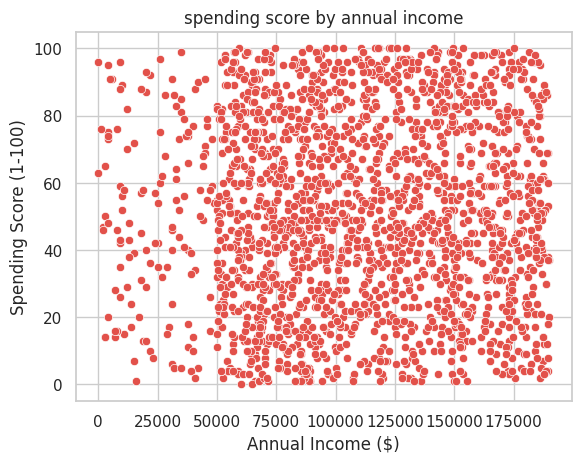

In [ ]:
sns.scatterplot(data=df, x=df["Annual Income ($)"], y=df["Spending Score (1-100)"] )
plt.title("spending score by annual income")
plt.show()

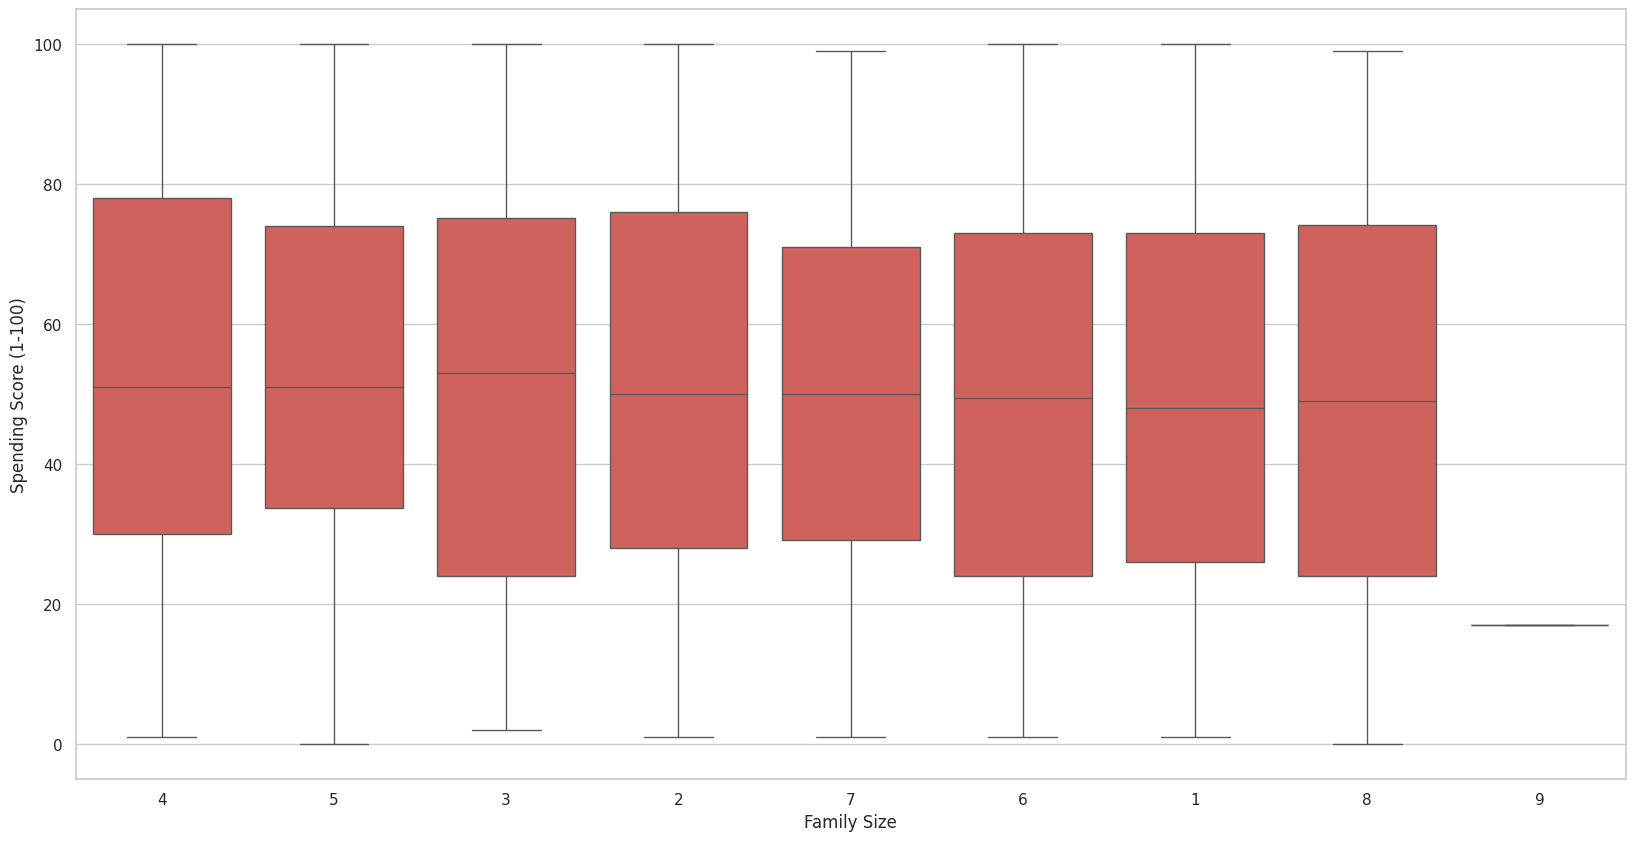

In [ ]:
mean_scores = df.groupby('Family Size')['Spending Score (1-100)'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Family Size', y='Spending Score (1-100)', order=mean_scores.index)
plt.show()



*   Customers dengan Family Size 4 memilki Spending Score yang paling tinggi namun tidak jauh berbeda dengan Family Size lainnya.



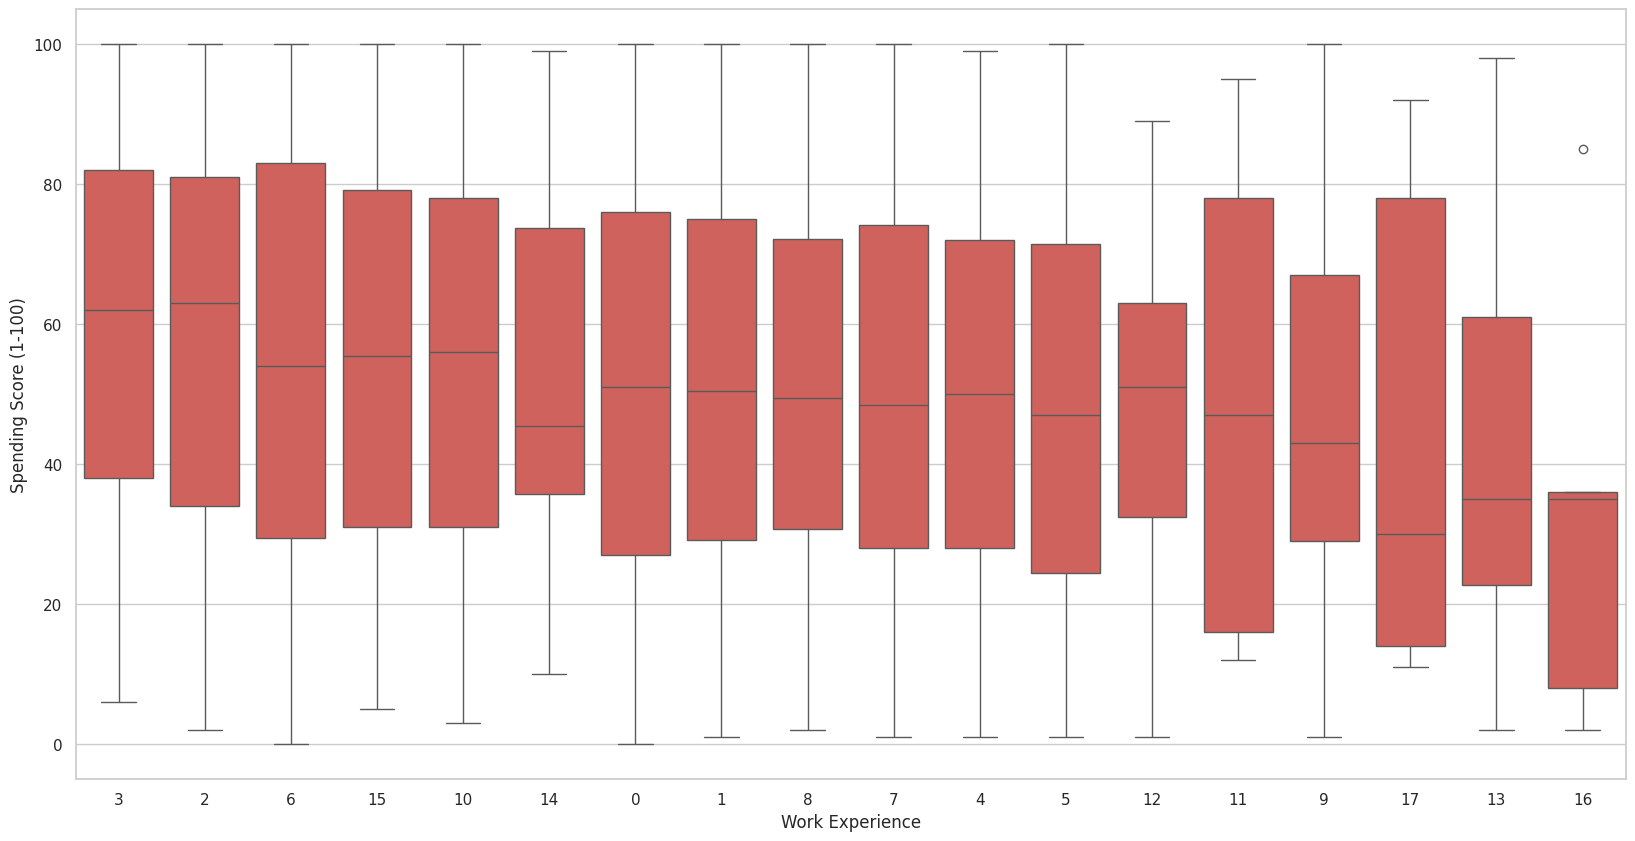

In [ ]:
mean_scores = df.groupby('Work Experience')['Spending Score (1-100)'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Work Experience', y='Spending Score (1-100)', order=mean_scores.index)
plt.show()



*   Customers yang memiliki pengalaman kerja selama 2 - 3 tahun memilki rata rata Spending Score yang lumayan tinggi di bandingkan yang lainnya tinggi


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

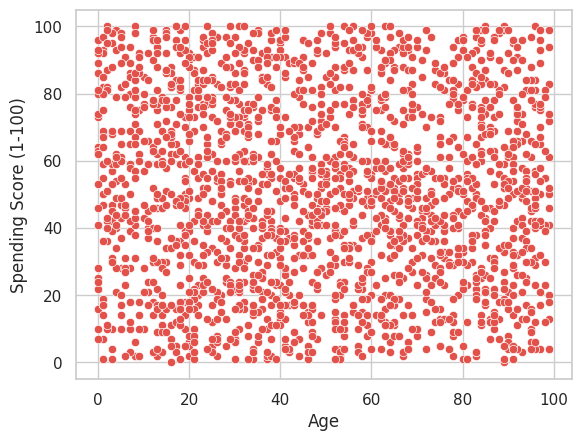

In [ ]:
sns.scatterplot(data=df, x=df["Age"], y=df["Spending Score (1-100)"] )

*  Umur customer tidak memengaruhi spending score

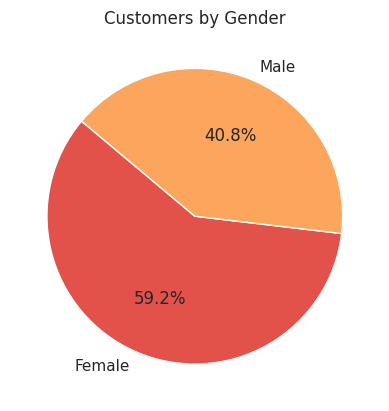

In [ ]:
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].sum()
plt.pie(gender_spending, labels=gender_spending.index, autopct='%1.1f%%', startangle=140)
plt.title('Customers by Gender')
plt.show()



*   Customers perempuan 20% lebih banyak dibanding customers laki laki.


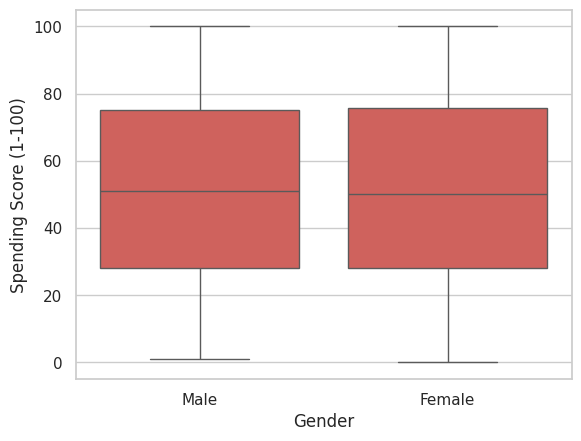

In [ ]:
mean_scores = df.groupby('Gender')['Spending Score (1-100)'].mean().sort_values(ascending=False)
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', order=mean_scores.index)
plt.show()



*   Customers laki laki cenderung memiliki rata rata Spending Score lebih tinggi.



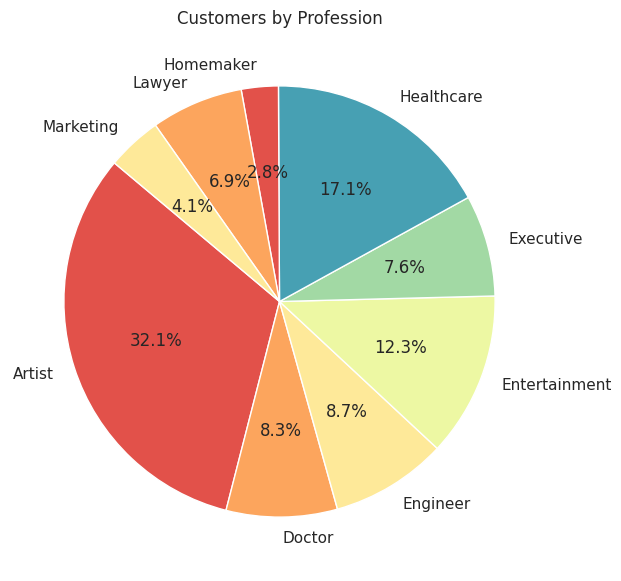

In [ ]:
gender_spending = df.groupby('Profession')['Spending Score (1-100)'].sum()
plt.figure(figsize=(7, 7))
plt.pie(gender_spending, labels=gender_spending.index, autopct='%1.1f%%', startangle=140)
plt.title('Customers by Profession')
plt.show()



*   32.1 % customers paling banyak berprofesi sebagai Artist dimana merupakan yang paling mendominasi, kemudian diikuti oleh Healthcare di urutan ke dua mencapai 17.1%



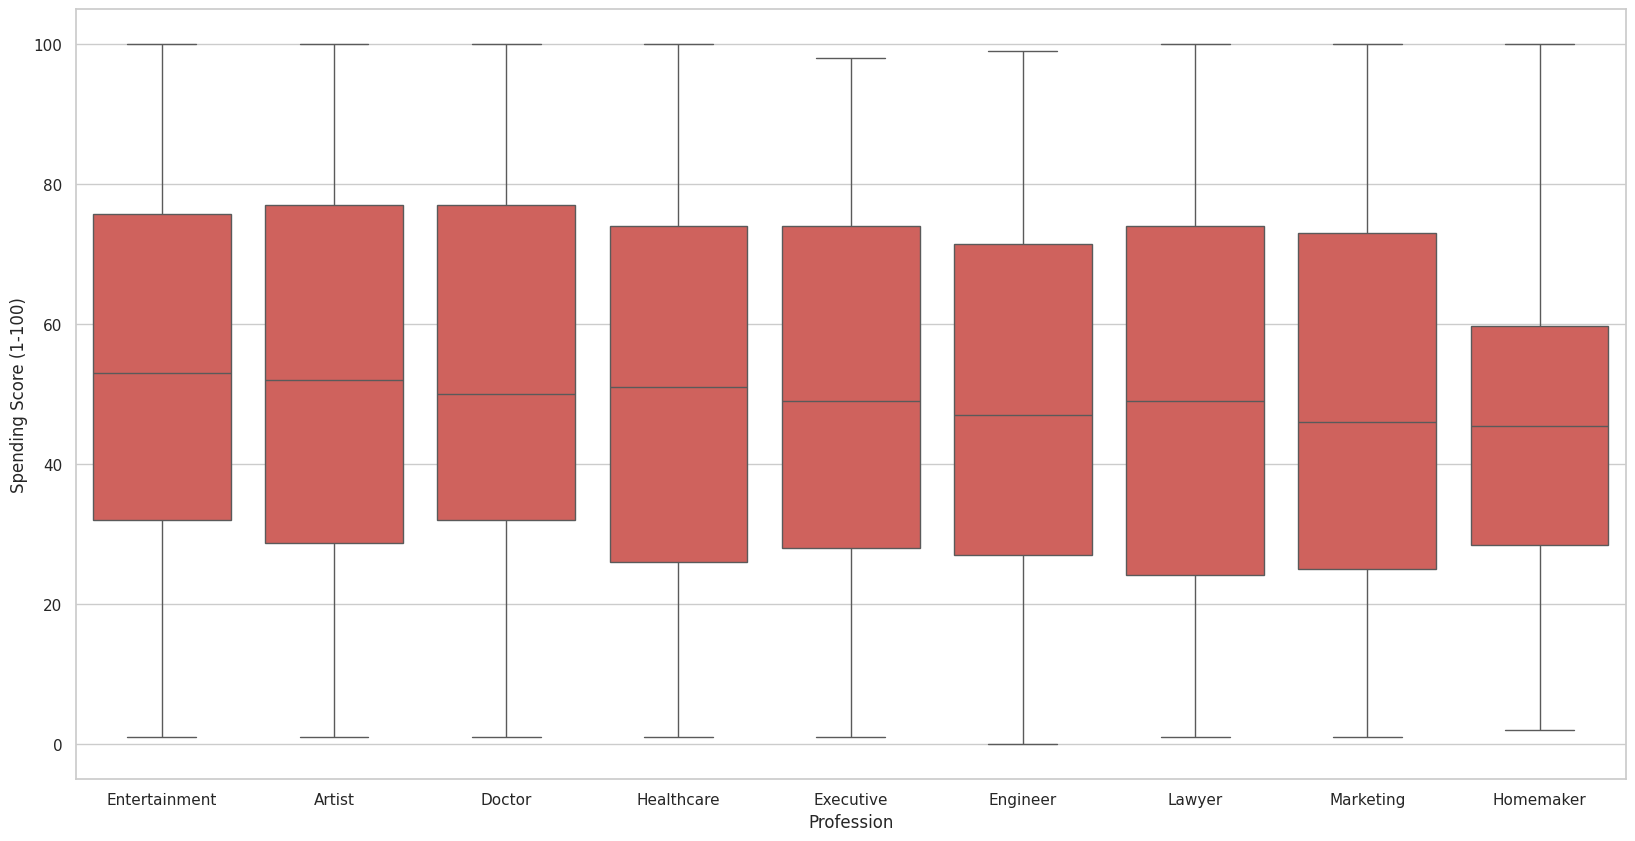

In [ ]:
mean_scores = df.groupby('Profession')['Spending Score (1-100)'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Profession', y='Spending Score (1-100)', order=mean_scores.index)
plt.show()



*   Customers yang berprofesi sebagai Entertainment memiliki rata rata Spending Score yang paling tinggi.